# JAGS example in PyMC3

This notebook attempts to solve the same problem that has been solved manually in [w02-04b-mcmc-demo-continuous.ipynb](http://localhost:8888/notebooks/w02-04b-mcmc-demo-continuous.ipynb), but using PyMC3 instead of JAGS as demonstrated in the course video.

## Problem Definition

Data is for personnel change from last year to this year for 10 companies. Model is defined as follows:

$$y_i | \mu \overset{iid}{\sim} N(\mu, 1)$$
$$\mu \sim t(0, 1, 1)$$

where y<sub>i</sub> represents personnel change for company i, and the distribution of y<sub>i</sub> given $\mu$ is a Normal distribution with mean $\mu$ and variance 1. Prior distribution of $\mu$ is a t distribution with location 0, scale parameter 1, and degrees of freedom 1 (also known as Cauchy's distribution).

Model is not conjugate, thus posterior is not a standard form that we can conveniently sample. To get posterior samples, we will need to setup a Markov chain, whose stationery distribution is the posterior distribution we want.

Main difference with manually solved example is that we don't need to compute the analytical form of the posterior for our simulation.


## PyMC3 Solution

JAGS usage follows the 4 step process:
* Specify model -- this is the first 2 lines in the `with model` block in cell 3.
* Setup model -- this is the observed attribute in y_obs where real values of y are plugged in.
* Run MCMC sampler -- the block under the `run MCMC sampler` command. The call to `update` and `coda.sample` is merged into a single `pm.sample` call with separate `n_iter` and `n_tune` variables. The `step` attribute is set to Metropolis-Hastings as that is the preferred sampler in the course, PyMC3 default is the NUTS sampler.
* Post-processing -- whatever we do with `trace["mu"]` after the sampling is done.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
y = np.array([1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9])
n_iter = 1000
n_tune = 500

with pm.Model() as model:
    # model specification, and setup (set observed=y)
    mu = pm.StudentT("mu", nu=1, mu=0, sigma=1)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=1, observed=y)
    
    # run MCMC sampler
    step = pm.Metropolis()  # PyMC3 default is NUTS, course uses Metropolis-Hastings
    trace = pm.sample(n_iter, tune=n_tune, step=step)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:01<00:00, 3068.79draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [4]:
# post-processing
mu_sims = trace["mu"]

print("mu_sims     :", mu_sims)
print("len(mu_sims): {:d}".format(len(mu_sims)))

mu_sims     : [0.6333883  0.6333883  0.46444808 ... 0.9055146  0.9055146  1.60293898]
len(mu_sims): 4000


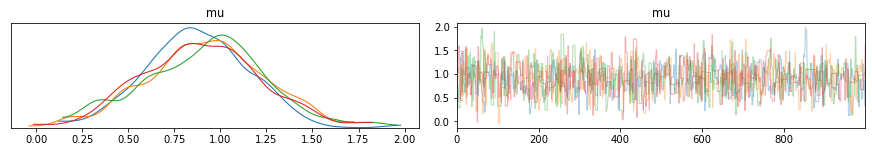

In [5]:
_ = pm.traceplot(trace)

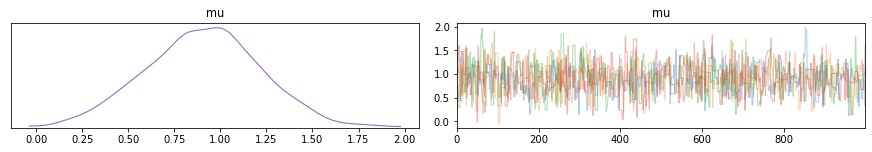

In [6]:
_ = pm.traceplot(trace, combined=True)

In [7]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.901,0.314,0.317,1.476,0.01,0.007,921.0,895.0,924.0,881.0,1.01


## Reference

* [Markov Chain Monte Carlo for Bayesian Inference - the Metropolis Algorithm](https://www.quantstart.com/articles/Markov-Chain-Monte-Carlo-for-Bayesian-Inference-The-Metropolis-Algorithm/)